# LASSO Model

##### Author: Holly Bok

### Importing Packages  and Clean Dataset

In [1]:
# Importing packages

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
# Importing cleaned train data and test data

train = pd.read_csv('datasets/clean_train.csv')
test = pd.read_csv('datasets/test.csv')


In [3]:
# Dropping outliers identified in the Linear Regression model. Details of this process can be found in the
# '02 Linear Regression' file of this repository under the 'EDA aned Feature Selection' subheader

train.drop([960], axis=0, inplace= True) 
train.drop([1885], axis=0, inplace= True)
train.drop([1409], axis=0, inplace= True)
train.drop([1566], axis=0, inplace= True)
train.drop([1605], axis=0, inplace= True)
train.drop([1035], axis=0, inplace= True)
train.drop([1141], axis=0, inplace= True)
train.drop([1939], axis=0, inplace= True)

In [4]:
# Creating a new dataframe called numeric_train that includes all of the numeric columms
# Filling all NaN values with 0, just as in the linear regression model

numeric_columns = train._get_numeric_data().columns
numeric_train = train[numeric_columns]
numeric_train = numeric_train.fillna(0)

### Train-Test-Split and Feature Transformations

In [5]:
# Setting X and Y. X is all numeric columns except for the target column, Sale Price. Y is our target columns,
# Sale Price.
# Running train_test_split to split numeric_train into testing and training portions

X = numeric_train.drop(columns=['SalePrice'])
y = numeric_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Instantiating and fitting to polynomial features. This creates interaction terms for all of our numeric data.

pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train);

In [7]:
# Doing polynomial transformations for dependent variables on both the train and test data

X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)

In [8]:
# Instantiating and fitting a standard scaler. This will scale all of the independent variables to be on the same
# numeric scale.

ss = StandardScaler()
ss.fit(X_train_pf);

In [9]:
# Doing standard scaling transformations for dependent variables on both the train and test data

X_train_pfs = ss.transform(X_train_pf)
X_test_pfs = ss.transform(X_test_pf)

### Fitting and Scoring to LASSO Model

In [10]:
# Instantiating a LassoCV model

lcv = LassoCV(max_iter = 1500)

In [11]:
cross_val_score(lcv, X_train_pfs, y_train).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448955475.73313904, tolerance: 40437

0.916942076487099

In [12]:
# Scoring train and test data

lcv.fit(X_train_pfs, y_train)
lcv.score(X_train_pfs, y_train), lcv.score(X_test_pfs, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.9400702246522403, 0.8930934913207212)

In [13]:
# Creating a new DataFrame called "lasso_coef" that shows the coefficients of each feature:

lasso_coef = pd.DataFrame({
    'feature': pf.get_feature_names(numeric_columns),
    'coef': lcv.coef_
})

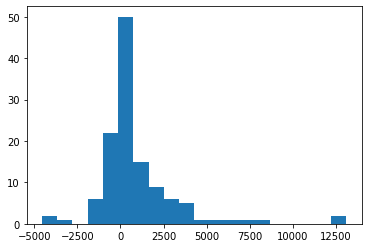

In [14]:
# Creating a dataframe called non_zero_coefs to observe the distribution of all coefficients that are not equal
# to 0. Plotting this distribution. 

non_zero_coefs = lasso_coef[lasso_coef['coef'] != 0]
plt.hist(non_zero_coefs['coef'], bins=20);

In [15]:
# Masking the lasso_coef to show only coefficients that are not 0.
# Sorting this list in descending order from the largest coefficient to the smallest.
# Observing the top 10 negative and positive coefficients

lasso_coef[lasso_coef['coef'] != 0].sort_values('coef', ascending=False).head(10)

,feature,coef
295,Overall Qual Total Bsmt SF,13102.152339
875,Gr Liv Area Kitchen Qual,12277.624904
292,Overall Qual BsmtFin SF 1,8390.932372
502,Exter Qual 1st Flr SF,7411.672807
300,Overall Qual Gr Liv Area,6291.182103
372,Year Built Year Remod/Add,5574.065289
313,Overall Qual Garage Cars,4345.302001
245,Lot Area Exter Qual,4129.592544
608,BsmtFin SF 1^2,3866.059360
722,Total Bsmt SF Half Bath,3855.039193


In [16]:
lasso_coef[lasso_coef['coef'] != 0].sort_values('coef', ascending=False).tail(10)

,feature,coef
159,MS SubClass Bsmt Unf SF,-1013.384488
618,BsmtFin SF 1 Bsmt Half Bath,-1033.905102
137,PID Open Porch SF,-1202.619265
586,Bsmt Cond Kitchen AbvGr,-1208.639513
670,BsmtFin SF 2 Open Porch SF,-1319.138556
1004,Bedroom AbvGr Garage Yr Blt,-1548.253476
538,Exter Cond Total Bsmt SF,-1717.412832
621,BsmtFin SF 1 Bedroom AbvGr,-2805.508825
456,Mas Vnr Area Exter Cond,-3919.927518
974,Half Bath^2,-4545.294583


### Generating Predictions for Test Dataset

In [17]:
# Converting the test dataframe columns to match train dataframe

test['PID'] = test['PID'].astype(object)

def rank_test_column(column):   
    test[column] = test[column].str.replace('Ex', '5')
    test[column] = test[column].str.replace('Gd', '4')
    test[column] = test[column].str.replace('TA', '3')
    test[column] = test[column].str.replace('Fa', '2')
    test[column] = test[column].str.replace('Po', '1')
    test[column] = test[column].fillna(0)
    test[column] = test[column].astype(int)
    return

rank_test_column('Exter Qual')
rank_test_column('Exter Cond')
rank_test_column('Heating QC')
rank_test_column('Kitchen Qual')
rank_test_column('Garage Qual')
rank_test_column('Garage Cond')
rank_test_column('Pool QC')
rank_test_column('Bsmt Cond')

In [18]:
test['Paved Drive'] = test['Paved Drive'].str.replace('Y', '3')
test['Paved Drive'] = test['Paved Drive'].str.replace('P', '2')
test['Paved Drive'] = test['Paved Drive'].str.replace('N', '1')
test['Paved Drive'] = test['Paved Drive'].astype(int)

In [19]:
test['Functional'] = test['Functional'].str.replace('Typ', '6')
test['Functional'] = test['Functional'].str.replace('Min2', '5')
test['Functional'] = test['Functional'].str.replace('Min1', '5')
test['Functional'] = test['Functional'].str.replace('Mod', '4')
test['Functional'] = test['Functional'].str.replace('Maj1', '3')
test['Functional'] = test['Functional'].str.replace('Maj2', '3')
test['Functional'] = test['Functional'].str.replace('Sev', '2')
test['Functional'] = test['Functional'].str.replace('Sal', '1')
test['Functional'] = test['Functional'].astype(int)

In [20]:
test['Garage Finish'] = test['Garage Finish'].str.replace('Fin', '3')
test['Garage Finish'] = test['Garage Finish'].str.replace('RFn', '2')
test['Garage Finish'] = test['Garage Finish'].str.replace('Unf', '1')
test['Garage Finish'] = test['Garage Finish'].fillna(0)
test['Garage Finish'] = test['Garage Finish'].astype(int)

In [21]:
# Creating a list of features equal to the independent variables.
# Creating a new dataframe called test_numeric by masking the original test dataframe with "features"
# Filling NaN values with 0 to match training dataset

features = numeric_columns.drop(['SalePrice'])
test_numeric = test[features]
test_numeric = test_numeric.fillna(0)

In [22]:
# Transforming test_numeric using polynomial transformation and standard scaler

test_numeric_pf = pf.transform(test_numeric)
test_numeric_pfs = ss.transform(test_numeric_pf)

In [23]:
# Generating predictions and saving predictions as a new column

predictions = lcv.predict(test_numeric_pfs)
test['SalePrice'] = predictions

In [24]:
# Writing csv file with Lasso predictions

holly_predictions = test[['Id','SalePrice']]
holly_predictions.to_csv('datasets/Holly_Preds_Lasso.csv', index=False)